# Random Forest

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
data1 = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/2nd/Cleaned data-Nancy(before sub-sample).csv")
dataN = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/1 Credit Card Debt Crisis/2nd/Cleaned Sub-sample-Nancy.csv")
# data1 is data cleaning's "data", dataN is "new_data"

In [9]:
data1

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1,3,2,32,6,110,138,5,2847,...,7,331,1080,12,535,1671,3,4800,6799,1
1,14400.0,2,3,2,30,-2,0,132,-2,0,...,-2,0,0,-2,45,0,-2,136,45,0
2,8100.0,1,1,2,29,-1,133,7,-1,1700,...,-1,751,-4,-1,498,747,-1,381,496,0
3,2700.0,2,2,1,31,0,104,2891,0,140,...,0,40,2842,0,60,1187,0,19,1153,0
4,14500.0,2,2,1,37,-2,309,403,-2,94,...,-2,362,381,-2,0,362,-2,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30565,1700.0,2,2,1,29,0,80,1598,0,80,...,0,56,1598,0,52,1556,0,80,1509,0
30566,4700.0,1,1,2,33,2,80,2082,0,80,...,0,100,2194,0,100,2258,0,100,2321,1
30567,6000.0,2,1,2,53,0,191,5418,0,198,...,0,165,5740,0,201,5842,0,140,5994,1
30568,14500.0,2,3,2,46,-2,28,0,-2,0,...,-2,61,0,-2,0,61,-2,0,0,0


In [10]:
dataN

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,8000.0,1,2,1,34,-1,187,187,-1,187,...,-1,187,187,-1,187,187,-1,187,187,1
1,600.0,1,3,1,56,3,48,505,8,414,...,3,8,74,4,177,311,3,123,501,1
2,7600.0,1,2,1,58,2,263,5407,0,235,...,0,136,4523,0,139,4617,0,200,4712,0
3,2400.0,2,1,2,27,0,400,1560,0,118,...,-1,798,182,-1,32,769,0,36,753,0
4,6900.0,1,2,2,30,0,120,2255,0,120,...,0,120,2236,0,120,2147,0,120,2058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13751,8000.0,1,2,2,44,0,368,8040,0,360,...,0,240,6155,0,240,6214,0,240,6351,0
13752,2700.0,2,3,1,36,2,98,2033,2,0,...,2,0,2168,2,168,2109,2,88,2236,1
13753,2000.0,1,2,2,35,0,120,1942,0,120,...,0,28,837,0,40,786,0,40,813,0
13754,14300.0,1,2,1,40,-1,125,59,-1,0,...,-1,59,59,-1,59,59,-1,59,59,0


In [12]:
# Original
X=data1.drop(columns="July_Payment_Status")
y=data1["July_Payment_Status"]
# Sub-sample
Xn=dataN.drop(columns="July_Payment_Status")
yn=dataN["July_Payment_Status"]

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=30)# Original

XtrainN, XtestN, YtrainN, YtestN = train_test_split(Xn, yn, test_size=0.3, random_state=30)# sub-sample

In [16]:
#Original
rfc = RandomForestClassifier(n_estimators= 91,random_state=30)
rfc = rfc.fit(Xtrain,Ytrain)
y_pred=rfc.predict(Xtest)
score_r = rfc.score(Xtest,Ytest)

print("Original data:",score_r)

#Sub-sample
rfcN = RandomForestClassifier(n_estimators= 91,random_state=30)
rfcN = rfc.fit(XtrainN,YtrainN)
yn_pred=rfc.predict(XtestN)
score_rN = rfc.score(XtestN,YtestN)

print("Sub-sample data:",score_rN)

Original data: 0.8074364845709301
Sub-sample data: 0.6879088926581052


In [17]:
#Original
from sklearn.model_selection import GridSearchCV         #time warning
parameter = {"n_estimators":range(1,101,10)}
rfc1 = RandomForestClassifier(random_state=30)  
GS = GridSearchCV(rfc, param_grid=parameter, cv=10)
GS.fit(Xtrain,Ytrain)

print(GS.best_params_)
print(GS.best_score_)

{'n_estimators': 91}
0.8113930869958448


In [18]:
# Sub-sample
parameter = {"n_estimators":range(1,101,10)}
rfcN = RandomForestClassifier(random_state=30)  
GS = GridSearchCV(rfc, param_grid=parameter, cv=10)
GS.fit(XtrainN,YtrainN)

print(GS.best_params_)
print(GS.best_score_)

{'n_estimators': 91}
0.7063037156495101


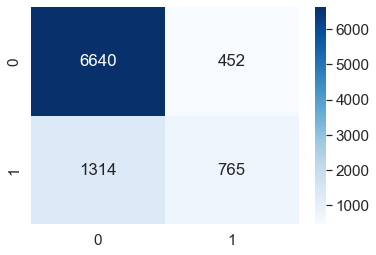

In [20]:
#Original
cm = confusion_matrix(Ytest, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [21]:
print(classification_report(Ytest, y_pred, digits=6)) # Original

              precision    recall  f1-score   support

           0   0.834800  0.936266  0.882627      7092
           1   0.628595  0.367965  0.464199      2079

    accuracy                       0.807436      9171
   macro avg   0.731698  0.652116  0.673413      9171
weighted avg   0.788055  0.807436  0.787772      9171



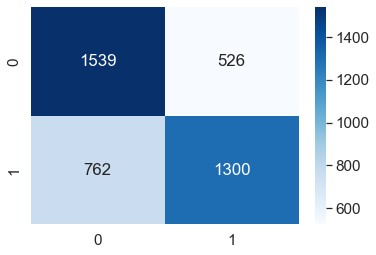

In [23]:
#Sub-sample
cmN = confusion_matrix(YtestN, yn_pred)
sns.set(font_scale=1.4)
sns.heatmap(cmN, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [25]:
print(classification_report(YtestN, yn_pred, digits=6)) # Sub-sample

              precision    recall  f1-score   support

           0   0.668840  0.745278  0.704993      2065
           1   0.711939  0.630456  0.668724      2062

    accuracy                       0.687909      4127
   macro avg   0.690389  0.687867  0.686859      4127
weighted avg   0.690373  0.687909  0.686872      4127

